# Titanic - Predict Survival - Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic_test = pd.read_csv('test.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Column name description

* Survived: Survival, where 0 = No and 1 = Yes
* Pclass: Ticket class, where 1 = 1st, 2 = 2nd, 3 = 3rd
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
* Name: Name of the passenger
* Sex: Sex of the passenger
* Age: Age of the passenger
* SibSp: # of siblings/spouses aboard the Titanic
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: # of parents/children aboard the Titanic
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them
* Ticket: Ticket Number
* Fare: Price of the ticket
* Cabin: Cabin number
* Embarked: Port of Embarkation, where C = Cherbourg, Q = Queenstown, S = Southampton


## EDA (Exploratory Data Analysis)

### Missing values

<AxesSubplot:>

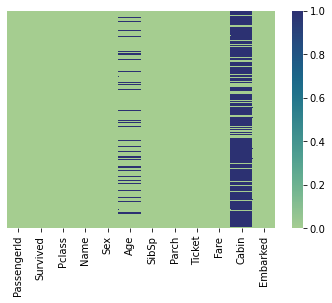

In [7]:
sns.heatmap(titanic.isnull(), yticklabels=False, cmap="crest")

Dark blue line indicates missing data. <br />
There seems to be a lot of missing data for cabin, it won't be very useful. (Best to drop)

### Remove columns that won't give much information

In [8]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic_test.drop('Cabin',axis=1,inplace=True)

We can also drop name and ticket, since they don't seem to have a standard format, thus doesn't bring much information.

In [9]:
titanic.drop(['Name', 'Ticket'],axis=1,inplace=True)
titanic_test.drop(['Name', 'Ticket'],axis=1,inplace=True)

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### Fill missing data
There were a few missing data for age. We could maybe fill in the values.

<AxesSubplot:>

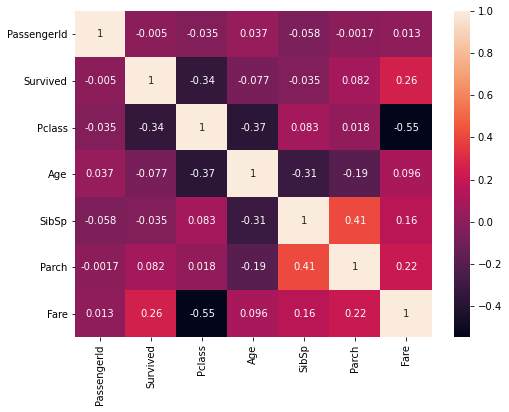

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(), annot=True)

There is no strong correlation between the age of the passenger and other variables. <br />The strongest would be ticket class (Pclass) and the number of siblings and spouse (SibSp). 

We can look at the mean of age for each ticket class and grouped by number of siblings and spouse.

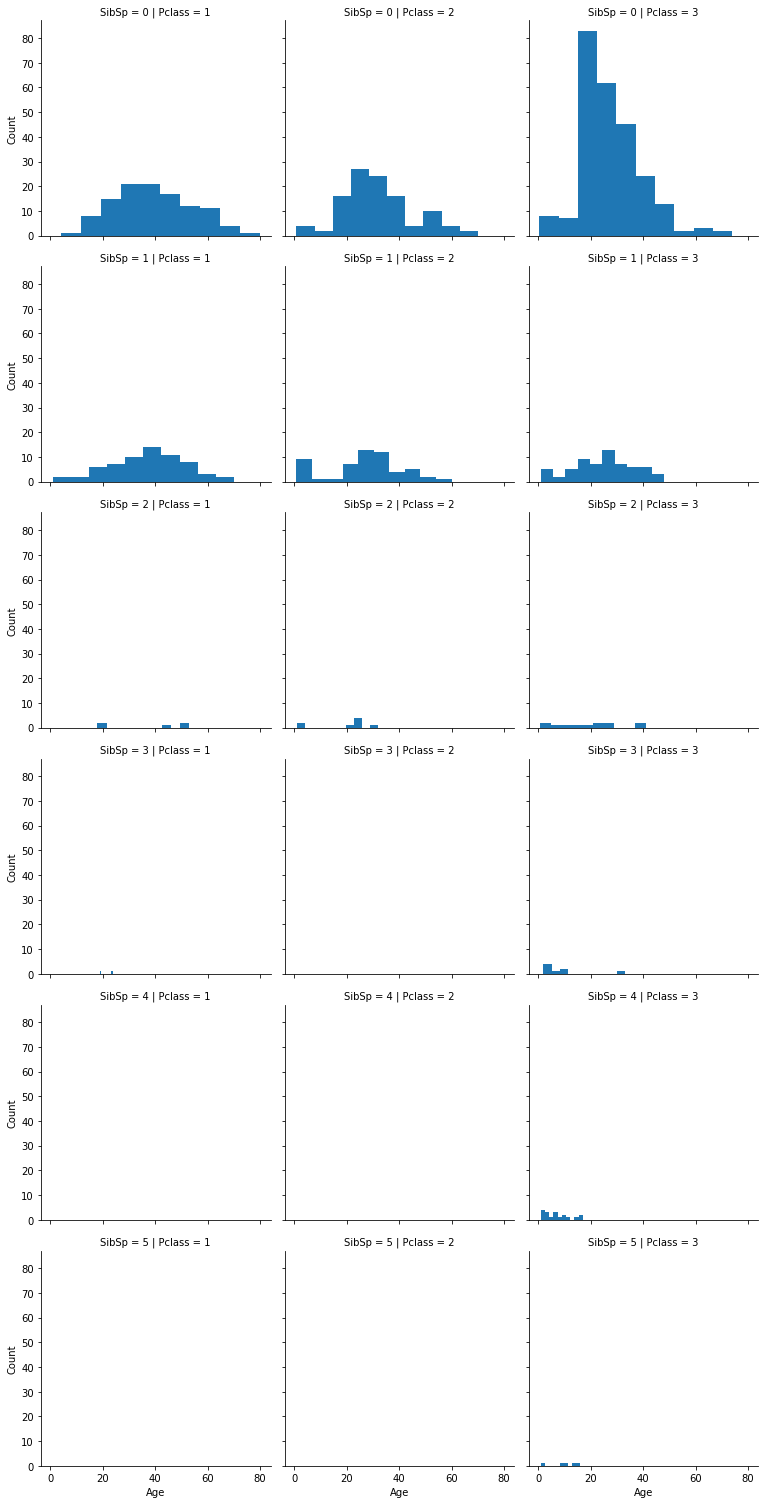

In [13]:
g = sns.FacetGrid(titanic.dropna(), col="Pclass",  row="SibSp", height=3.5, aspect=1 )
g = g.map(plt.hist, "Age").add_legend()
g.set_axis_labels("Age", "Count")

Let's see if we can look at the number of passengers for each group separated by ticket class (Pclass) and the number of spouse or siblings (SibSp).

In [14]:
titanic.dropna()[titanic.dropna()['Pclass'] == 1].groupby("SibSp").agg(count=('Sex', 'size'), mean=('Age', 'mean')).reset_index()

,SibSp,count,mean
0,0,111,38.986486
1,1,65,37.414154
2,2,5,37.200000
3,3,3,22.000000


In [15]:
titanic.dropna()[titanic.dropna()['Pclass'] == 2].groupby("SibSp").agg(count=('Sex', 'size'), mean=('Age', 'mean')).reset_index()

,SibSp,count,mean
0,0,109,31.934220
1,1,55,27.363636
2,2,8,19.125000
3,3,1,30.000000


In [16]:
titanic.dropna()[titanic.dropna()['Pclass'] == 3].groupby("SibSp").agg(count=('Sex', 'size'), mean=('Age', 'mean')).reset_index()

,SibSp,count,mean
0,0,249,27.630201
1,1,63,24.912698
2,2,12,18.875000
3,3,8,8.875000
4,4,18,7.055556
5,5,5,10.200000


In [17]:
titanic.groupby("Pclass").mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

It seems that as the number of siblings and spouse increases, the age of passengers decreases. Which would make sense since if you have a lot of siblings, you are likely to be a kid travelling with family. Also class 1 seems to be older than most passengers in class 3.

We will create a function that can fill missing data.

In [18]:
def compute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    SibSp = cols[2]
    if pd.isnull(Age):
        if Pclass == 1:
            if SibSp == 0:
                return 40
            elif SibSp == 1:
                return 37
            elif SibSp == 2:
                return 37
            else:
                return 22
        elif Pclass == 2:
            if SibSp == 0:
                return 32
            elif SibSp == 1:
                return 27
            elif SibSp == 2:
                return 19
            else:
                return 30
        else:
            if SibSp == 0:
                return 38
            elif SibSp == 1:
                return 30
            else:
                return 25
    else:
        return Age

#Apply function on missing values
titanic['Age'] = titanic[['Age','Pclass','SibSp']].apply(compute_age,axis=1)
titanic_test['Age'] = titanic_test[['Age','Pclass','SibSp']].apply(compute_age,axis=1)

<AxesSubplot:>

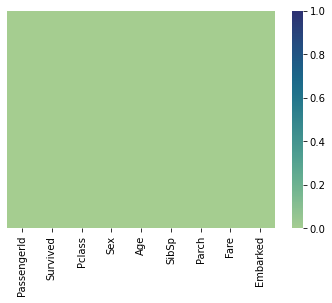

In [19]:
sns.heatmap(titanic.isnull(), yticklabels=False, cmap="crest")

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [21]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [22]:
titanic = titanic.dropna()
titanic_test['Fare'] = titanic_test['Fare'].fillna(value=titanic_test['Fare'].mean())

In [23]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


### Data Visualization
We will look at how many people survived and the different variables to try to predict what features seems to give a higher change of survival.
0 means did not survive
1 means did survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

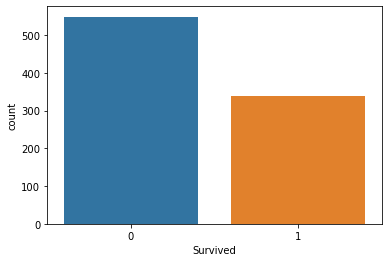

In [24]:
#Total number of people who did and did not survive.
sns.countplot(x='Survived',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

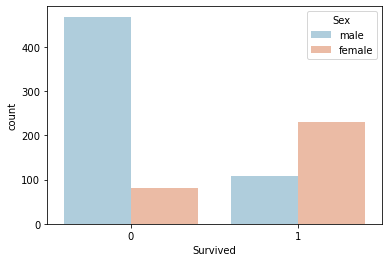

In [25]:
# Survival rates based on sex/gender
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

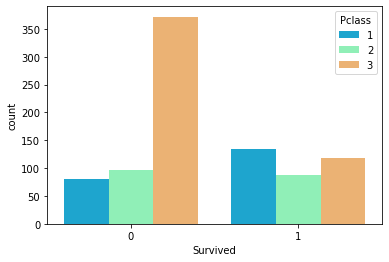

In [26]:
# Survival rates based on passenger class
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='count'>

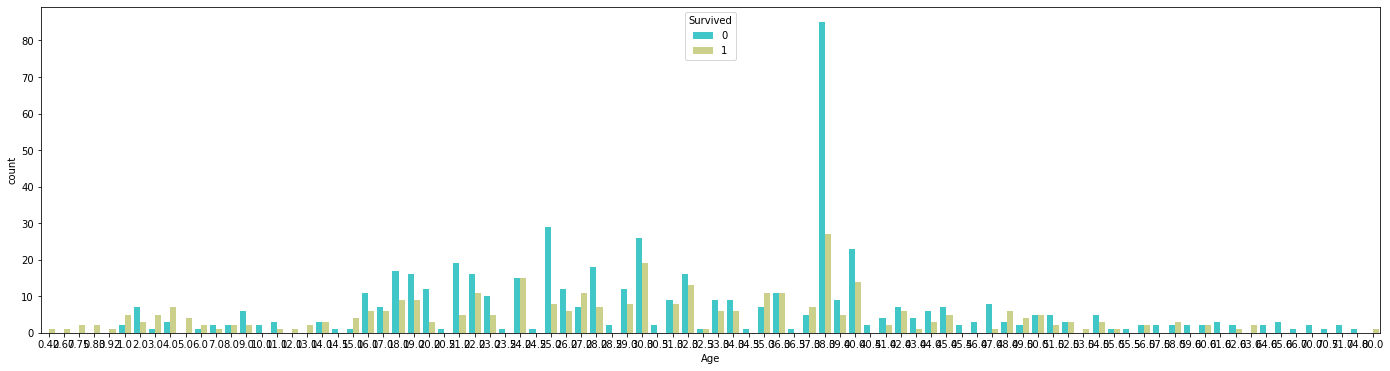

In [27]:
# Survival rates based on age
plt.figure(figsize=(24,6))
sns.countplot(x='Age',hue='Survived',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

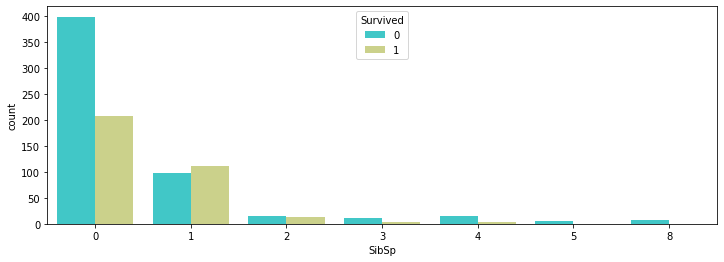

In [28]:
# Survival rates based on Siblings and spouse
plt.figure(figsize=(12,4))
sns.countplot(x='SibSp',hue='Survived',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Parch', ylabel='count'>

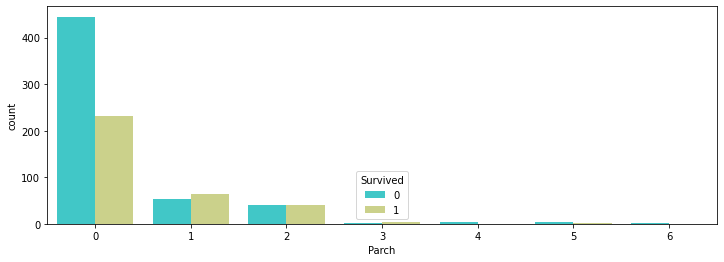

In [29]:
# Survival rates based on Parents and children
plt.figure(figsize=(12,4))
sns.countplot(x='Parch',hue='Survived',data=titanic,palette='rainbow')

<AxesSubplot:>

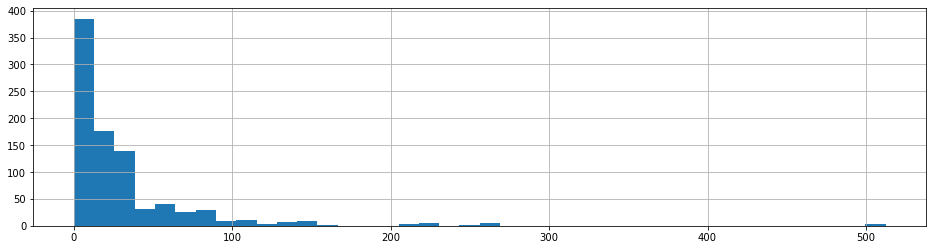

In [30]:
# Fare distribution
plt.figure(figsize=(18,6))
titanic['Fare'].hist(bins=40,figsize=(16,4))

<AxesSubplot:xlabel='Embarked', ylabel='count'>

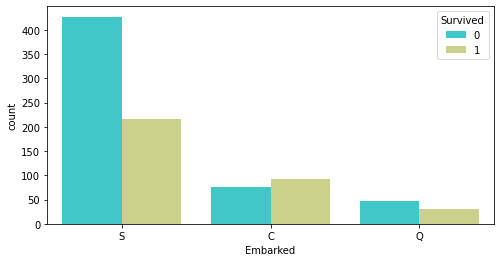

In [31]:
# Survival rates based on Embarked port
plt.figure(figsize=(8,4))
sns.countplot(x='Embarked',hue='Survived',data=titanic,palette='rainbow')

## Convert Categorical Features to Numerical Characteristics

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [33]:
titanic = pd.get_dummies(titanic ,columns=['Sex','Embarked'],drop_first=True)
titanic_test = pd.get_dummies(titanic_test ,columns=['Sex','Embarked'],drop_first=True)

titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,30.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## Building Machine Learning Models

We will try the following machine learning models and test the efficiency of each.
* Logistic Regression
* K-Nearest Neighbors
* Decision Trees
* Random Forest
* Support Vector Machine

### Logistic regression

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
#Predictions of set X_test to assess how well this method works
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 33,  71]], dtype=int64)

#### Prediction of test file
Perform logistic regression on all data and predict data of test file.

In [39]:
logmodel1 = LogisticRegression(max_iter = 1000)
logmodel1.fit(titanic.drop('Survived',axis=1),titanic['Survived'])

LogisticRegression(max_iter=1000)

In [40]:
#Read the test file and predict
predictions1 = logmodel1.predict(titanic_test)

In [41]:
output = titanic_test.filter(['PassengerId'])
output['Survived'] = predictions1
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
#output.to_csv('titanic_logistic.csv',index=False)

Score when tested on Kaggle: 0.76794

### K-Nearest Neighbors

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(titanic.drop('Survived',axis=1))
scaled_features_train = scaler.transform(titanic.drop('Survived',axis=1)) #Perform standardization 

titanic_feat = pd.DataFrame(scaled_features_train,columns=titanic.drop('Survived',axis=1).columns)
titanic_feat.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.732505,0.825209,-0.666465,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.728611,-1.572211,0.532422,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,-1.724718,0.825209,-0.366744,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.720825,-1.572211,0.307630,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,-1.716931,0.825209,0.307630,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


In [44]:
#Also need to perform standardization on test set
scaled_features_test = scaler.transform(titanic_test) #Perform standardization 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_train,titanic['Survived'],
                                                    test_size=0.30)

Text(0, 0.5, 'Error Rate')

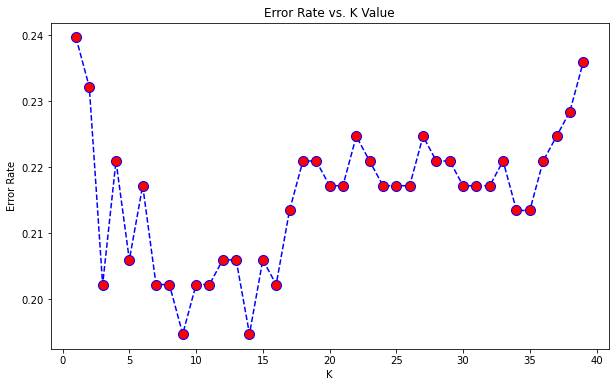

In [46]:
from sklearn.neighbors import KNeighborsClassifier

#Find a good k value
error_rate = []

# Will take some time
# Iteration
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We will set it a 7, after that it seems to overfit.

In [47]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [48]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[139  24]
 [ 30  74]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       163
           1       0.76      0.71      0.73       104

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



#### Prediction of test file
Perform K-Nearest Neighbors on all data and predict data of test file.

In [49]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(scaled_features_train,titanic['Survived'])
pred1 = knn1.predict(scaled_features_test)

In [50]:
output = titanic_test.filter(['PassengerId'])
output['Survived'] = pred1
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
# output.to_csv('titanic_KNN.csv',index=False)

Score when tested on Kaggle: 0.76555

### Decision Tree

In [52]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],
                                                    test_size=0.30)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       170
           1       0.66      0.72      0.69        97

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.77      0.76      0.77       267



[[134  36]
 [ 27  70]]


#### Prediction of test file
Perform Decision Tree on all data and predict data of test file.

In [55]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(titanic.drop('Survived',axis=1),titanic['Survived'])

DecisionTreeClassifier()

In [56]:
predictions = dtree1.predict(titanic_test)

In [57]:
output = titanic_test.filter(['PassengerId'])
output['Survived'] = predictions
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
#output.to_csv('titanic_decisionTree.csv',index=False)

Score when tested on Kaggle: 0.72009

### Random Forests

In [59]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],
                                                    test_size=0.30)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[143  15]
 [ 32  77]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       158
           1       0.84      0.71      0.77       109

    accuracy                           0.82       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.82      0.82       267



#### Prediction of test file
Perform Random Forests on all data and predict data of test file.

In [61]:
rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(titanic.drop('Survived',axis=1),titanic['Survived'])

RandomForestClassifier()

In [62]:
rfc_pred1 = rfc1.predict(titanic_test)

In [63]:
output = titanic_test.filter(['PassengerId'])
output['Survived'] = rfc_pred1
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
#output.to_csv('titanic_randomForest.csv',index=False)

Score when tested on Kaggle: 0.76315

### Support Vector Machine

In [65]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],
                                                    test_size=0.30)

In [66]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [67]:
predictions = model.predict(X_test)

In [68]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[171   2]
 [ 83  11]]


              precision    recall  f1-score   support

           0       0.67      0.99      0.80       173
           1       0.85      0.12      0.21        94

    accuracy                           0.68       267
   macro avg       0.76      0.55      0.50       267
weighted avg       0.73      0.68      0.59       267



In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.600, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.600, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.608, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.524, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.556, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.581, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.568, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.568, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.597, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.656, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.710, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.758, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.742, total=   0.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [70]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[151  22]
 [ 53  41]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       173
           1       0.65      0.44      0.52        94

    accuracy                           0.72       267
   macro avg       0.70      0.65      0.66       267
weighted avg       0.71      0.72      0.70       267



#### Prediction of test file
Perform support vector machine on all data and predict data of test file.

In [71]:
#grid1 = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
#grid1.fit(titanic.drop('Survived',axis=1),titanic['Survived'])

model1 = SVC()
model1.fit(titanic.drop('Survived',axis=1),titanic['Survived'])

SVC()

In [72]:
#grid_predictions1 = grid1.predict(titanic_test)
predictions1 = model1.predict(titanic_test)

In [73]:
output = titanic_test.filter(['PassengerId'])
output['Survived'] = predictions1
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [75]:
output.to_csv('titanic_SVM.csv',index=False)

Score when tested on Kaggle: 0.63397

## Conclusion

Kaggle score for each algorithm:
* Logistic Regression: 0.76794
* K-Nearest Neighbors: 0.76555
* Decision Trees: 0.72009
* Random Forest: 0.76315
* Support Vector Machine: 0.63397

The best machine learning algorithm for the titanic dataset is Logistic Regression.